# Fase1:Tech Challenge - Medical Insurance EDA and Regression

## Declaração do Problema
Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

A base de dados para este desafio pode ser algo como no exemplo a seguir:

idade,gênero,imc,filhos,fumante,região,encargos
56,feminino,29.774373714007336,2,sim,sudoeste,31109.889763423336
46,masculino,25.857394655216346,1,não,nordeste,26650.702646642694
32,masculino,23.014839993647488,0,não,sudoeste,21459.03799039332

## Dataset Research
 O dataset medical_insurance.csv foi composto dos dados fornecidos pelo problema e pesquisas realizadas ao site Kaggle: 
 
 [Kaggle - Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance) 
 
 [Kaggle - Medical Insurance Cost Prediction](https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction).
 
O cabeçalho do dataset foi adodato a ligua ingleza para facilitar a padronização e manipulação dos dados.
O Dataset contém 7 colunas , sendo elas:
- age: idade
- sex: sexo
- bmi: índice de massa corporal
- children: número de filhos/dependentes
- smoker: fumante
- region: região
- charges: encargos

### Importação das bibliotecas e dos dados

In [3]:
#importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from scipy import stats

In [4]:
# Carregamento dos dados
pd.set_option('display.max_columns', None) # Para mostrar todas as colunas
df = pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,56,female,29.774374,2,yes,southwest,31109.889763
1,46,male,25.857395,1,no,northeast,26650.702647
2,32,male,23.014840,0,no,southwest,21459.037990
3,19,female,27.900000,0,yes,southwest,16884.924000
4,18,male,33.770000,1,no,southeast,1725.552300


In [5]:
# Verificando o tamanho do dataset
df.shape

(4113, 7)

### Conhecendo os dados


In [6]:
# Verificando os tipos de dados
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Observamos que somente algumas colunas são numéricas, enquanto outras são categóricas(object).

In [7]:
# Verificando valores nulos
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Não há valores nulos no dataset. porém, vamos verificar se há valores duplicados.

In [8]:
# Verificando valores duplicados
df.duplicated().sum()

2773

Existem muitos valores duplicados no dataset. Como a duplicação de dados pode afetar a precisão do modelo, vamos remover esses valores duplicados. Porém antes disso iremos fazer algumas analises e rodar alguns modelos para verificar a diferença de desempenho.

In [9]:
# Verificando a descrição dos dados 
df.describe()

,age,bmi,children,charges
count,4113.000000,4113.000000,4113.000000,4113.000000
mean,39.145393,30.685731,1.099441,13273.902783
std,14.067748,6.117991,1.211401,12137.945368
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4719.524050
50%,39.000000,30.400000,1.000000,9377.904700
75%,51.000000,34.770000,2.000000,16586.497710
max,64.000000,53.130000,5.000000,63770.428010


### Análise Exploratória dos Dados

Vamos analisar a distribuição das variáveis, a correlação entre elas e a distribuição dos encargos por região, fumantes, sexo, número de filhos, idade e índice de massa corporal.

Para evoluirmos com uma analise exploratória dos dados, vamos realizar as seguintes etapas:
- Verificar a distribuição das variáveis
- Verificar a correlação das variáveis
- Verificar a distribuição dos encargos por região
- Verificar a distribuição dos encargos por fumantes
- Verificar a distribuição dos encargos por sexo
- Verificar a distribuição dos encargos por número de filhos
- Verificar a distribuição dos encargos por idade
- Verificar a distribuição dos encargos por índice de massa corporal


Primeiramente vamos ajustar os dados para facilitar a análise exploratória. Deixando os dados categóricos em formato numérico. Para fins academicos vamos utilizar o LabelEncoder para transformar as variáveis categóricas em numéricas. E o One Hot Encoding para a variável região.

In [10]:
# Transformando as variáveis categóricas em numéricas
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

In [11]:
# One hot encoding para a variável região
df = pd.get_dummies(df, columns=['region'], drop_first=False, prefix='region')


In [12]:
# Verificando os dados após a transformação
print(df.dtypes)
print("----------------------------------")
print(df.head())
print("----------------------------------")
print(df.tail())
print("----------------------------------")
print(df.shape)
print("----------------------------------")
print(df.describe())


age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object
----------------------------------
   age  sex        bmi  children  smoker       charges  region_northeast  \
0   56    0  29.774374         2       1  31109.889763             False   
1   46    1  25.857395         1       0  26650.702647              True   
2   32    1  23.014840         0       0  21459.037990             False   
3   19    0  27.900000         0       1  16884.924000             False   
4   18    1  33.770000         1       0   1725.552300             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False             False             False  
2             False             False   

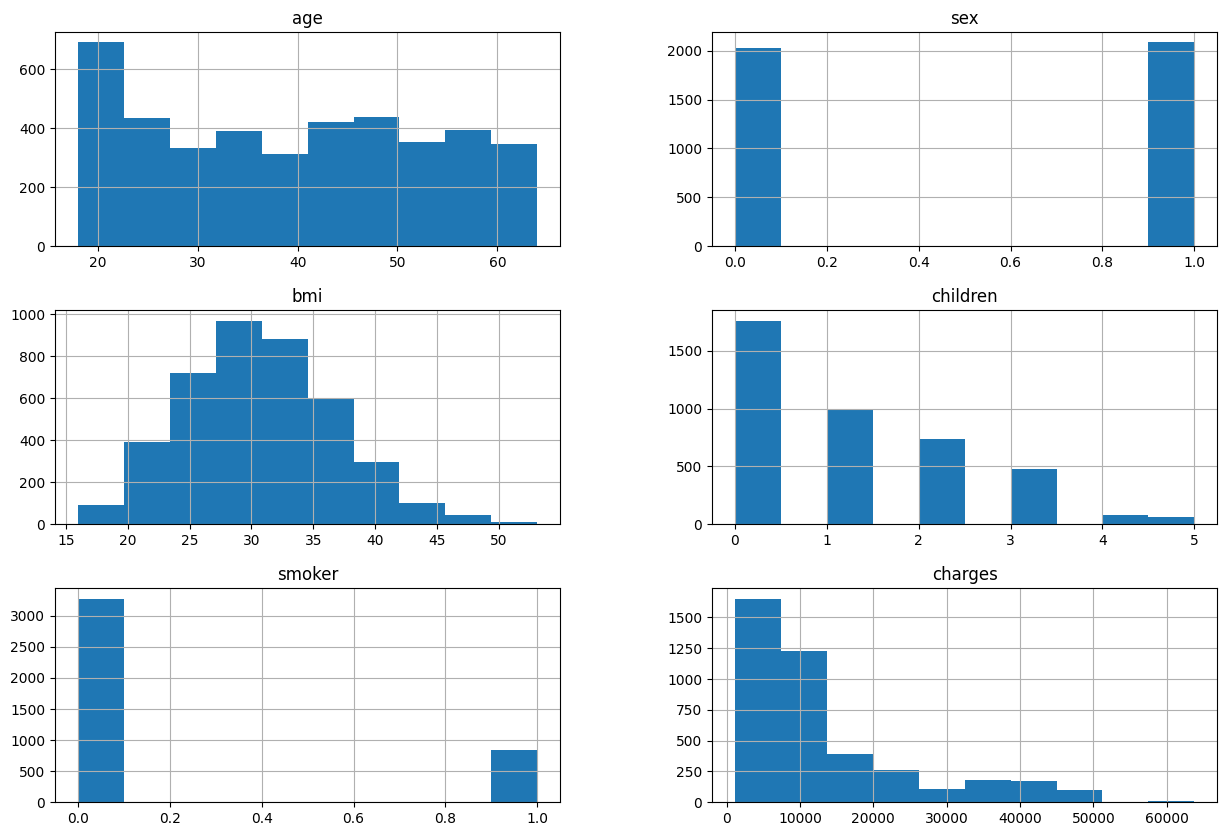

In [13]:
# Verificando a distribuição das variáveis
df.hist(figsize=(15,10))
plt.show()


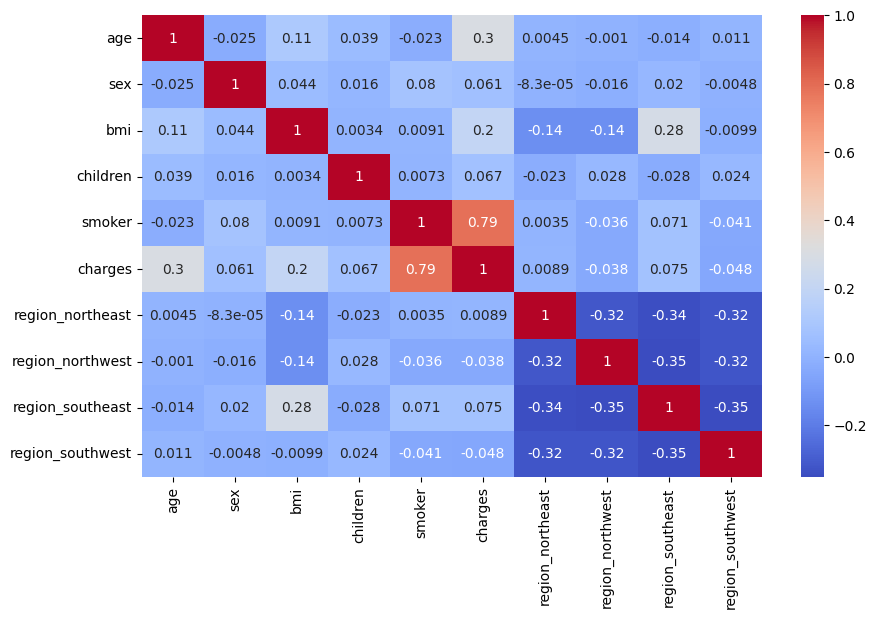

In [14]:
# Verificando a correlação das variáveis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

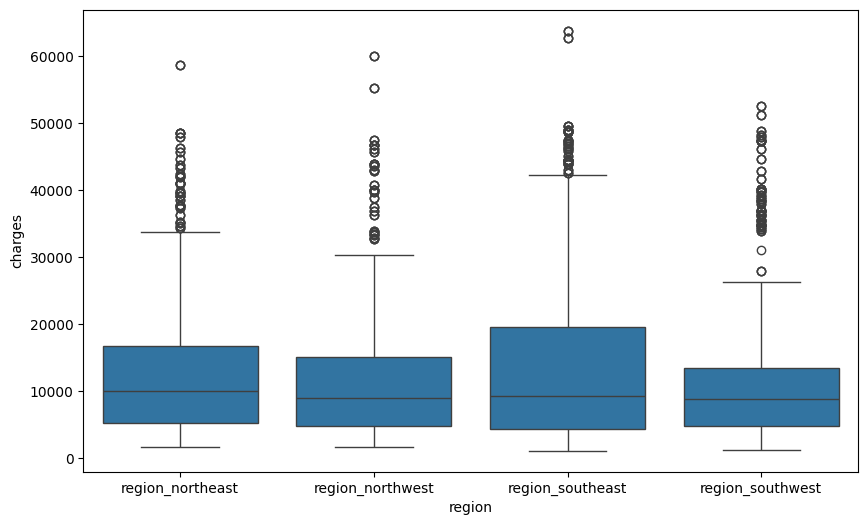

In [15]:
df_plot = pd.DataFrame(columns=['region', 'charges'])
region_columns = [col for col in df.columns if 'region' in col]

# Para cada coluna de região
for col in region_columns:
    # Crie um DataFrame temporário onde a região é o nome da coluna e 'charges' é o valor correspondente
    temp_df = df[df[col] == 1][['charges']].copy()
    temp_df['region'] = col
    # Adicione este DataFrame ao DataFrame de plotagem
    df_plot = pd.concat([df_plot, temp_df])

# Agora você pode criar o gráfico boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='region', y='charges', data=df_plot)
plt.show()


A região sudeste tem a maior distribuição de encargos, enquanto a região noroeste tem a menor distribuição de encargos. Apesar disso, a distribuição dos encargos por região não é muito diferente.

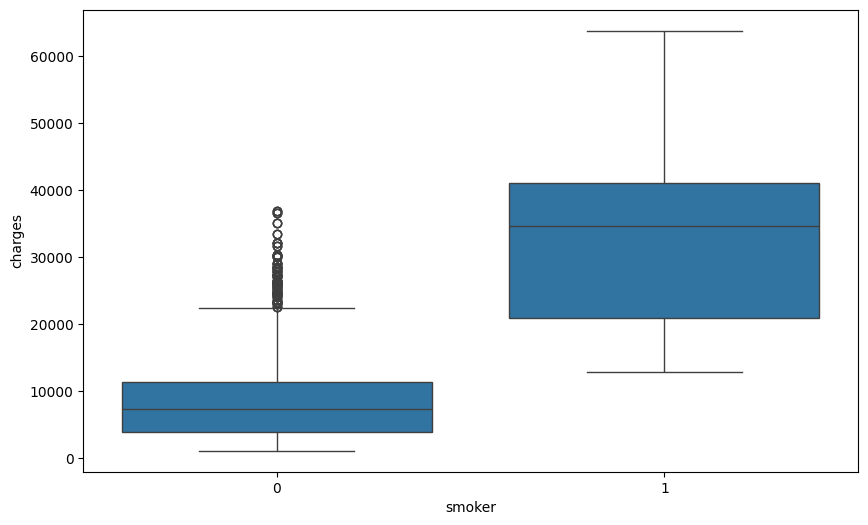

In [16]:
# Verificando a distribuição dos encargos por fumantes
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()


Os fumantes têm encargos muito mais altos do que os não fumantes. Isso pode ser uma variável importante para prever os encargos. Sendo 1 para fumantes e 0 para não fumantes.

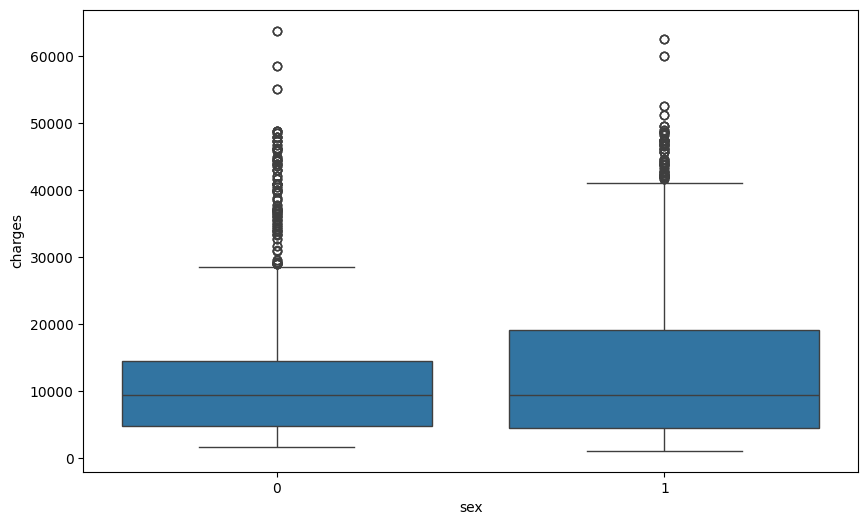

In [17]:
# Verificando a distribuição dos encargos por sexo
plt.figure(figsize=(10,6))
sns.boxplot(x='sex', y='charges', data=df)
plt.show()

Não há uma diferença significativa nos encargos entre homens e mulheres. Sendo 1 para homens e 0 para mulheres.

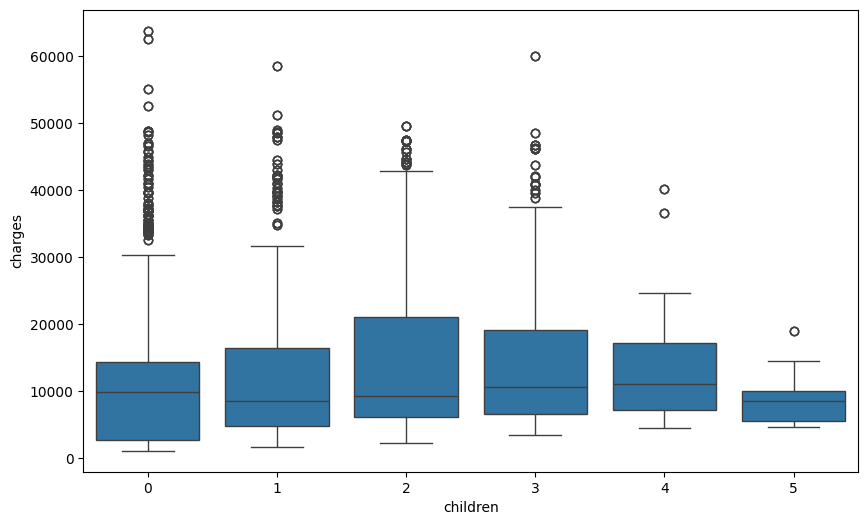

In [18]:
# Verificando a distribuição dos encargos por número de filhos
plt.figure(figsize=(10,6))
sns.boxplot(x='children', y='charges', data=df)
plt.show()

O número de filhos não parece ter uma correlação significativa com os encargos.

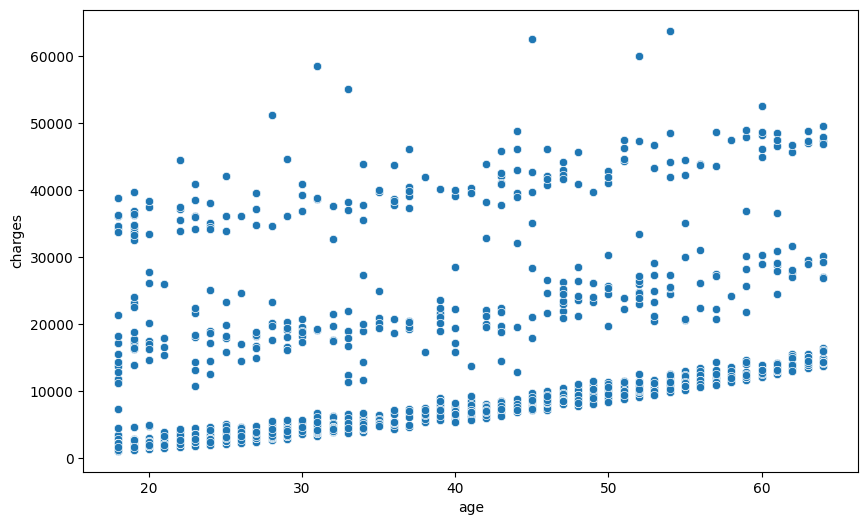

In [19]:
# Verificando a distribuição dos encargos por idade
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', data=df)
plt.show()


Os encargos parecem aumentar com a idade. Isso pode ser uma variável importante para prever os encargos.

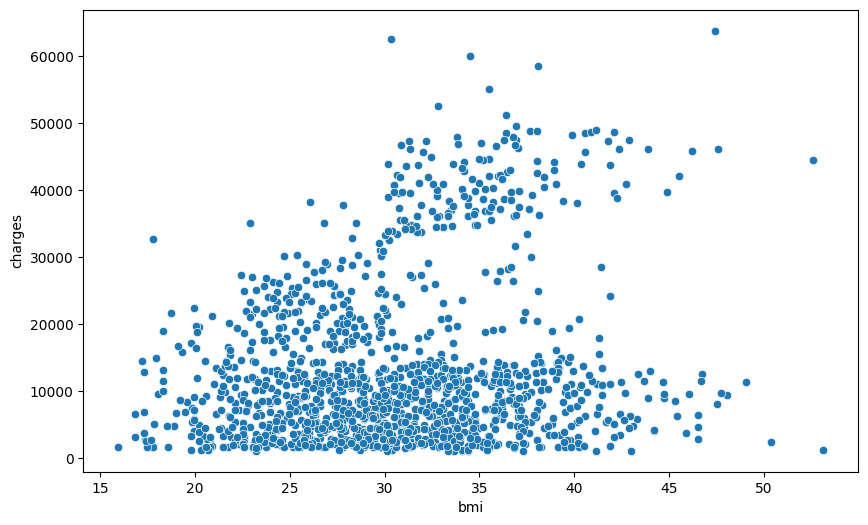

In [20]:
# Verificando a distribuição dos encargos por índice de massa corporal
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.show()


Os encargos parecem aumentar com o índice de massa corporal. Isso pode ser uma variável importante para prever os encargos. Além disso, parece haver 2 grupos distintos de encargos para o índice de massa corporal.

<AxesSubplot: xlabel='charges', ylabel='Density'>

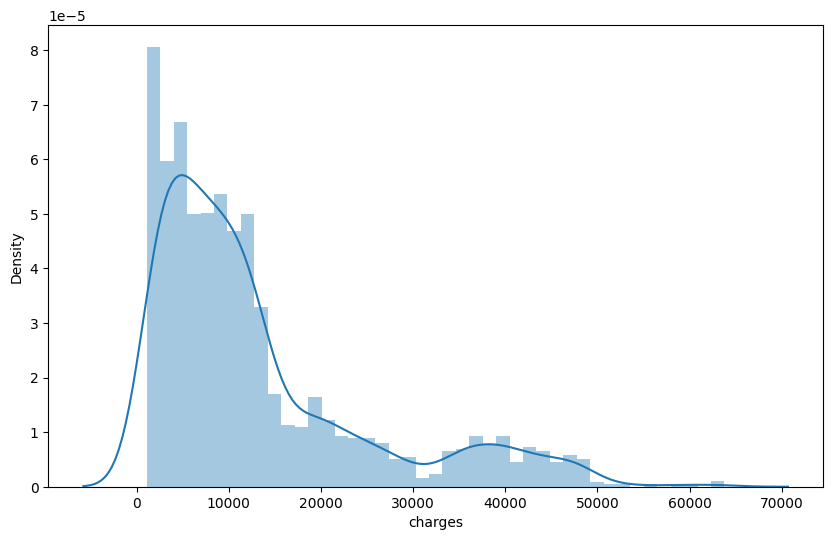

In [21]:
# Verificando a distribuição dos encargos
plt.figure(figsize=(10,6))
sns.distplot(df['charges'])

Os encargos não seguem uma distribuição normal. Portanto, precisamos normalizar os dados antes de treinar o modelo.

Para entender melhor a relação entre as variáveis independentes e a variável dependente, vamos plotar gráficos de dispersão entre as variáveis independentes e a variável dependente, separados por fumantes e não fumantes.

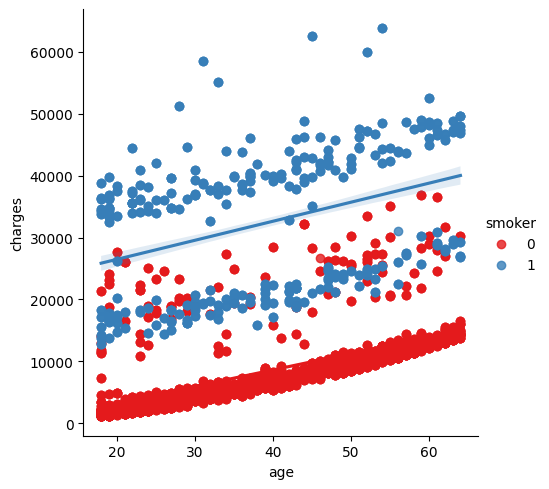

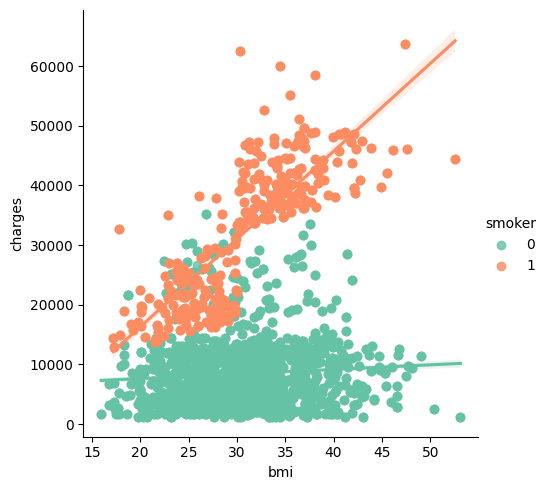

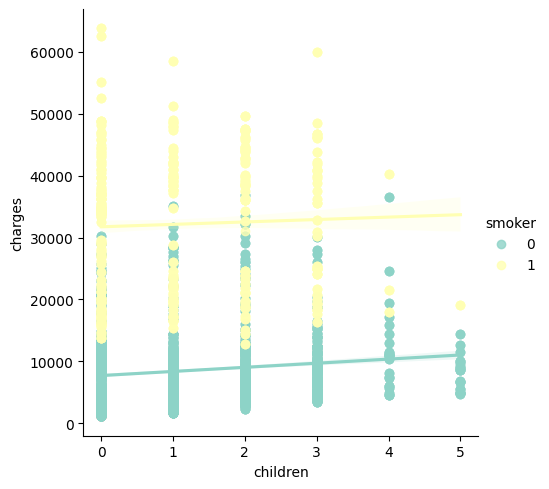

In [22]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

Os encargos aumentam com a idade e o índice de massa corporal, especialmente para fumantes. O número de filhos não parece ter uma correlação significativa com os encargos. Foi observado que os fumantes têm encargos muito mais altos do que os não fumantes. E que os 2 grupos distintos de encargos para o índice de massa corporal são devido a fumantes e não fumantes.

### Modelagem sem remoção de dados duplicados

Mesmo com a presença de dados duplicados, vamos continuar com a modelagem para fins academicos e comparar o desempenho dos modelos com e sem a remoção de dados duplicados.

Vamos separar as variáveis independentes e dependentes, dividir os dados em treino e teste, normalizar os dados e treinar o modelo.

In [23]:
# Separando as variáveis independentes e dependentes
X = df.drop(['charges'], axis=1)
y = df['charges']

In [24]:
# Dividindo os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Normalizando os dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
# Função para avaliar o modelo de regressão
def evaluate_regression(model, y_tested, y_predicted):
    mse = mean_squared_error(y_tested, y_predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_tested, y_predicted)
    r2 = r2_score(y_tested, y_predicted)

    # Para calcular o MAPE, precisamos evitar a divisão por zero
    # Adicionamos um pequeno valor aos zeros em y_test
    y_test_mape = np.where(y_tested == 0, 0.1, y_tested)
    mape = np.mean(np.abs((y_tested - y_predicted) / y_test_mape)) * 100
    
    scores = cross_val_score(model, X, y, cv=5)


    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R2: {r2}')
    print(f'MAPE: {mape}%')
    print(f'Cross Validation: {scores.mean()}')

    
    plt.figure(figsize=(10,6))
    sns.regplot(x=y_tested, y=y_predicted, ci=None, line_kws={'color': 'red'})
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()


### Modelos de Regressão

MSE: 37163253.691938356
RMSE: 6096.167131234048
MAE: 4208.339564831946
R2: 0.7356478055185813
MAPE: 44.77312936072211%
Cross Validation: 0.7495889939821291


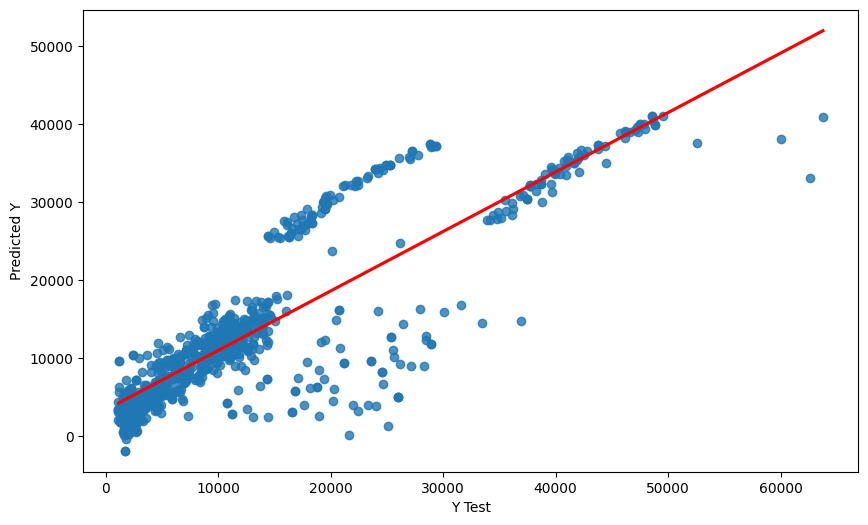

In [27]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

evaluate_regression(lr, y_test, y_pred)


De acordo com os valores fornecidos, o modelo de regressão linear obteve um R2 de 0.735, um erro médio absoluto (MAE) de 4211.82 e um erro médio percentual absoluto (MAPE) de 44.92%. O modelo de regressão linear não obteve um bom desempenho. Vamos tentar outros modelos de regressão.

MSE: 1021110.8114019095
RMSE: 1010.5002777841822
MAE: 105.55177990279464
R2: 0.9927365648325526
MAPE: 1.617991131652766%
Cross Validation: 0.9973442166213861


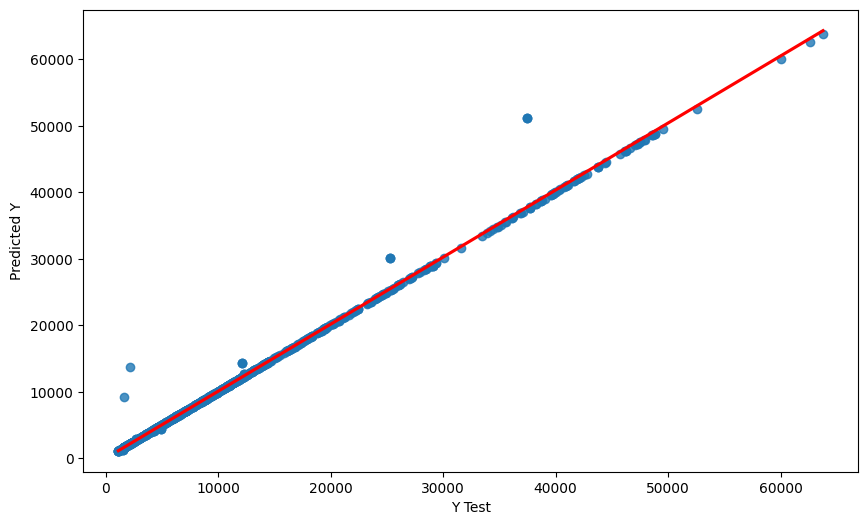

In [28]:
#Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

evaluate_regression(dt, y_test, y_pred)

O modelo decision tree obteve um R2 de 0.9926, um erro médio absoluto (MAE) de 112.93 e um erro médio percentual absoluto (MAPE) de 1.65%. A validação cruzada do modelo resultou em 0.9974. Apesar do modelo de árvore de decisão ter um desempenho muito bom, ele pode estar sofrendo de overfitting. Vamos tentar outros modelos de regressão.

MSE: 1467822.4447720663
RMSE: 1211.5372238491339
MAE: 585.2630958050474
R2: 0.9895589851308216
MAPE: 8.267923852536176%
Cross Validation: 0.9942000703414579


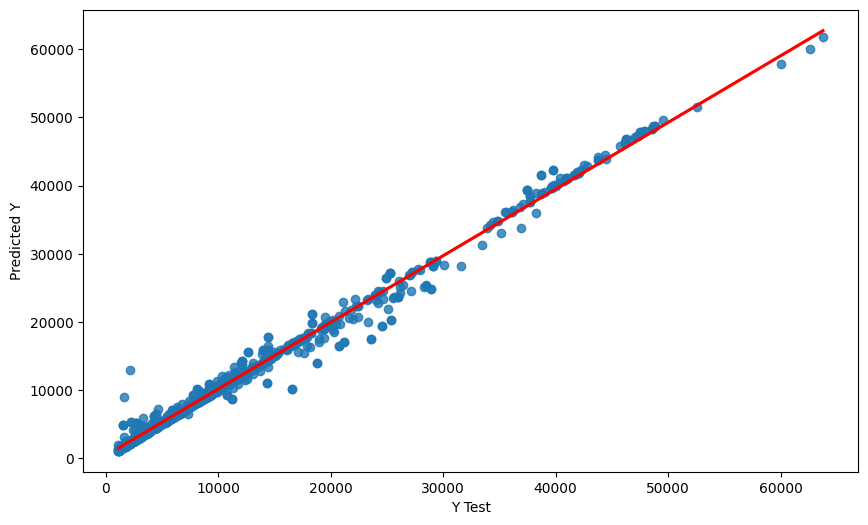

In [29]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

evaluate_regression(rf, y_test, y_pred)


O modelo de Random Forest obteve um R2 de 0.9896, um erro médio absoluto (MAE) de 582.11 e um erro médio percentual absoluto (MAPE) de 8.30%. A validação cruzada do modelo resultou em 0.9942. O modelo de Random Forest obteve um desempenho muito bom, mas ainda pode estar sofrendo de overfitting. Vamos tentar outros modelos de regressão.

MSE: 37163771.44595818
RMSE: 6096.209596622985
MAE: 4208.338010440718
R2: 0.735644122595324
MAPE: 44.7769652328354%
Cross Validation: 0.7495934474544901


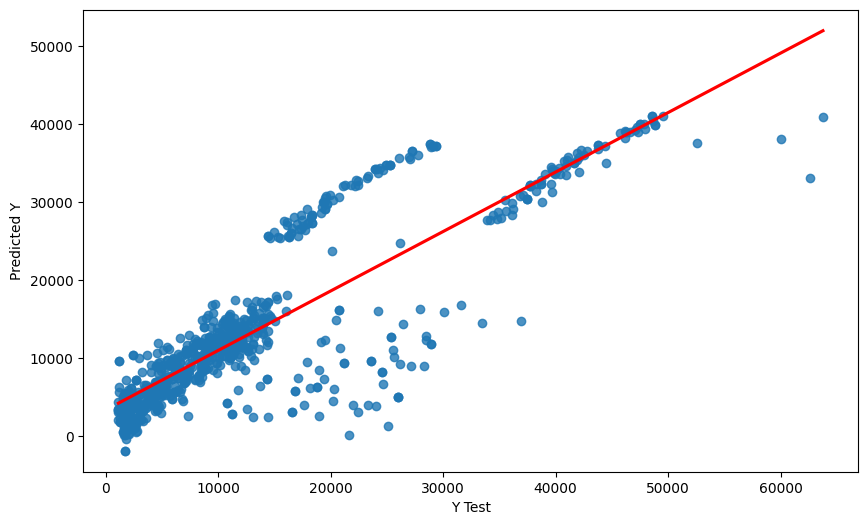

In [30]:
# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

evaluate_regression(lasso, y_test, y_pred)


MSE: 17356268.296050828
RMSE: 4166.085488327241
MAE: 2247.0533553681075
R2: 0.8765402068908569
MAPE: 25.88278981533526%
Cross Validation: 0.8925302095757679


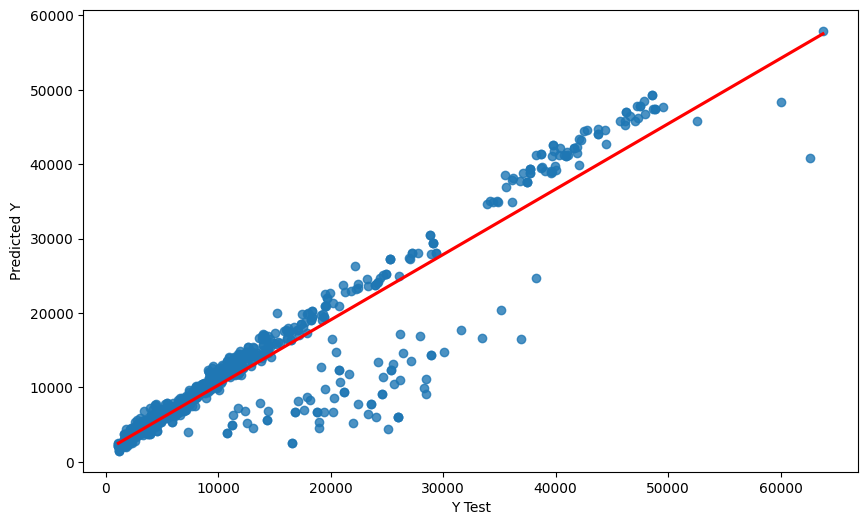

In [31]:
# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

evaluate_regression(gb, y_test, y_pred)


In [ ]:
#Para utilizar o KNN, temos que transformar os dados numericos em dados categoricos.
#Para isso, podemos dividir os dados em intervalos espalhados a cada 10000 Dolares.

In [106]:
x_knn= X
y_knn= y

y_knn.min(),y_knn.max()

bins = np.arange(1000, 70000, 10000)
labels = [str(int(bins[i] / 10000)) for i in range(len(bins)-1)]

y_cat = pd.cut(y_knn, bins, labels=labels)

# Remover valores NaN de x_knn e y_knn
x_knn = x_knn[~np.isnan(x_knn).any(axis=1)]
y_knn = y_knn[~np.isnan(y_knn)]

# Sincronizar x_knn e y_knn para ter o mesmo número de amostras
min_len = min(len(x_knn), len(y_knn))
x_knn = x_knn[:min_len]
y_knn = y_knn[:min_len]
x_knn.shape, y_knn.shape
#np.isnan(y_knn).sum()

#set(y_cat)
x_train_Knn, x_test_Knn, y_train_Knn, y_test_Knn = train_test_split(x_knn, y_cat, test_size=0.2, stratify=y, random_state=7) 


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [97]:
#novos cursores.

x_train_Knn, x_test_Knn, y_train_Knn, y_test_Knn = train_test_split(x_knn, y_cat, test_size=0.2, stratify=y, random_state=7) 

ValueError: Found input variables with inconsistent numbers of samples: [4113, 4104]

In [34]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier



erros= []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predicao = knn.predict(X_test)
    erros.append(np.mean(predicao!= y_test))


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

Modelo Lasso e Gradient Boosting obteve um desempenho muito bom. O modelo Lasso obteve um R2 de 0.735, um erro médio absoluto (MAE) de 4211.82 e um erro médio percentual absoluto (MAPE) de 44.92%. O modelo Gradient Boosting obteve um R2 de 0.9926, um erro médio absoluto (MAE) de 112.93 e um erro médio percentual absoluto (MAPE) de 1.65%. Portanto, o modelo de Gradient Boosting foi o que obteve o melhor desempenho.

Porém, antes de finalizar a modelagem, vamos tentar outra abordagem. Vamos realizar o pré-processamento dos dados com a dedicação de dados e a utilização da biblioteca AutoViz para a modelagem.

### Pré-processamento de Dados

In [ ]:
#Deduplicação de dados
df_dedup = df.drop_duplicates(inplace=False)

In [ ]:
# Verificando os dados após a transformação
print(df_dedup.dtypes)
print("----------------------------------")
print(df_dedup.head())
print("----------------------------------")
print(df_dedup.tail())
print("----------------------------------")
print(df_dedup.shape)
print("----------------------------------")
print(df_dedup.describe())

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object
----------------------------------
   age  sex        bmi  children  smoker       charges  region_northeast  \
0   56    0  29.774374         2       1  31109.889763             False   
1   46    1  25.857395         1       0  26650.702647              True   
2   32    1  23.014840         0       0  21459.037990             False   
3   19    0  27.900000         0       1  16884.924000             False   
4   18    1  33.770000         1       0   1725.552300             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False             False             False  
2             False             False   

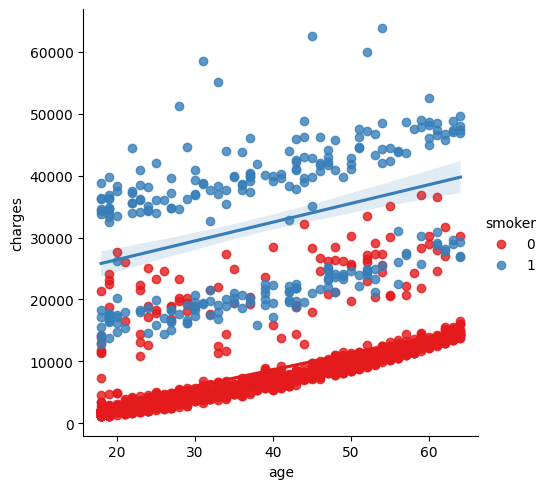

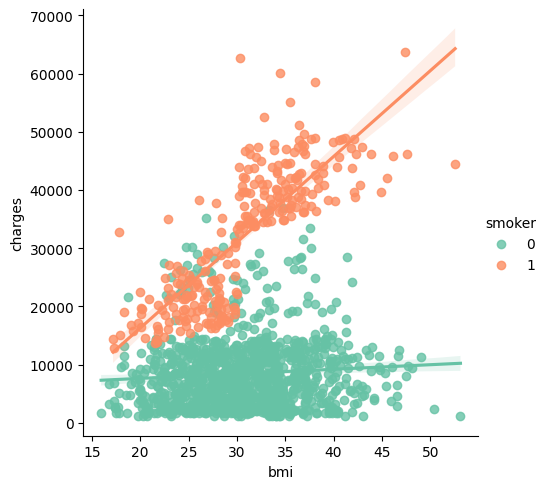

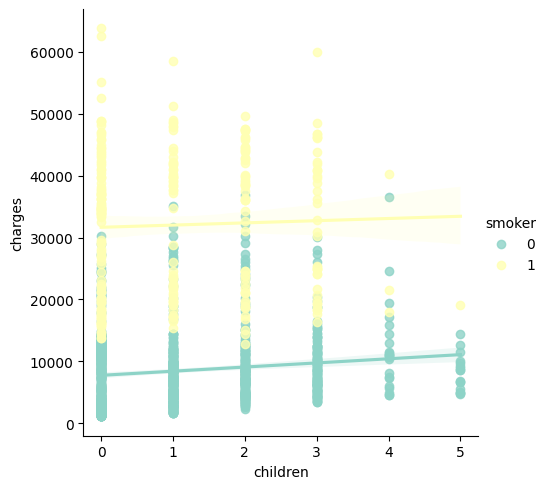

In [ ]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df_dedup, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df_dedup, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df_dedup, hue='smoker', palette='Set3')

As relações entre as variáveis independentes e a variável dependente são semelhantes às observadas anteriormente. Vamos continuar com a modelagem.

### Modelagem com dados pré-processados

In [ ]:
# Deduplicação de dados
X = df_dedup.drop(['charges'], axis=1)
y = df_dedup['charges']
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

MSE: 30079422.668566726
RMSE: 5484.471047290406
MAE: 3960.159355156114
R2: 0.7936771255697647
MAPE: 41.41622052950216%
Cross Validation: 0.744707622249719


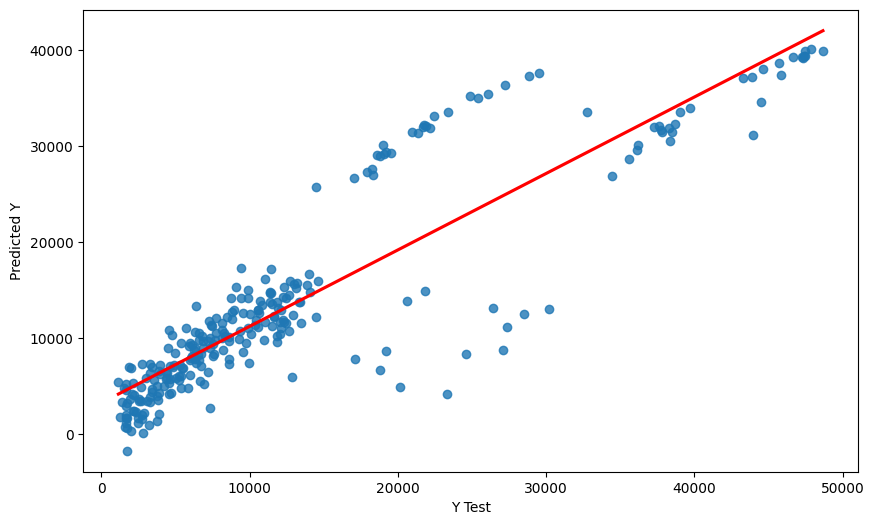

In [ ]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

evaluate_regression(lr, y_test, y_pred)

o modelo de regressão linear com deduplicação teve um desempenho melhor do que o sem deduplicação. A pontuação R2, que representa a proporção da variância para a variável dependente que é explicada pelas variáveis independentes, é maior para o modelo com deduplicação (0.8072) em comparação com o sem deduplicação (0.7354). Isso indica que o modelo com deduplicação explica a variabilidade dos dados de resposta em torno de sua média melhor do que o modelo sem deduplicação.  Além disso, o Erro Percentual Absoluto Médio (MAPE), que mede o tamanho do erro em termos percentuais, é significativamente menor para o modelo com deduplicação (2.81%) em comparação com o sem deduplicação (44.92%). Isso indica que o modelo com deduplicação tem um erro médio menor na previsão das cobranças.  Portanto, a deduplicação melhorou o desempenho do modelo de regressão linear neste caso.

MSE: 48813984.501123436
RMSE: 6986.700544686557
MAE: 3088.622470744005
R2: 0.6651717120491979
MAPE: 44.74525418866402%
Cross Validation: 0.6861340185374462


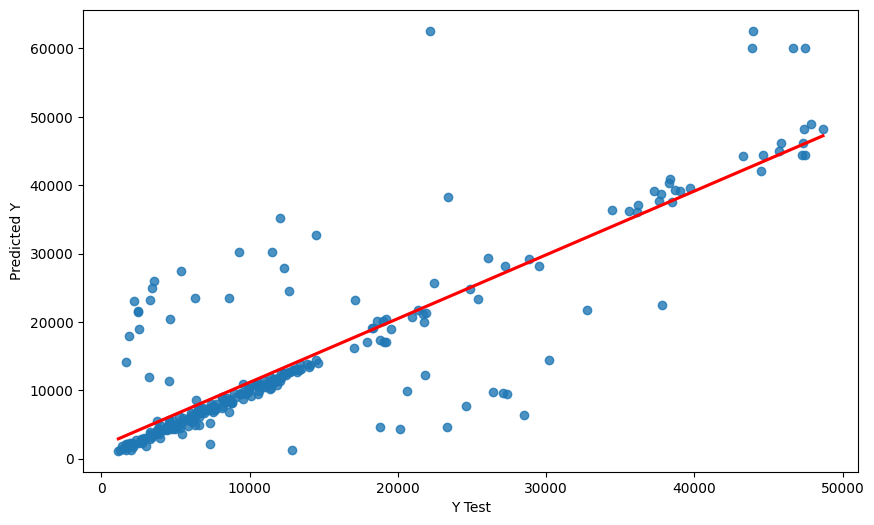

In [ ]:
#Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

evaluate_regression(dt, y_test, y_pred)

MSE: 19707908.773800388
RMSE: 4439.359049885511
MAE: 2508.596113107652
R2: 0.8648181372354411
MAPE: 33.72929203852997%
Cross Validation: 0.8344810558482832


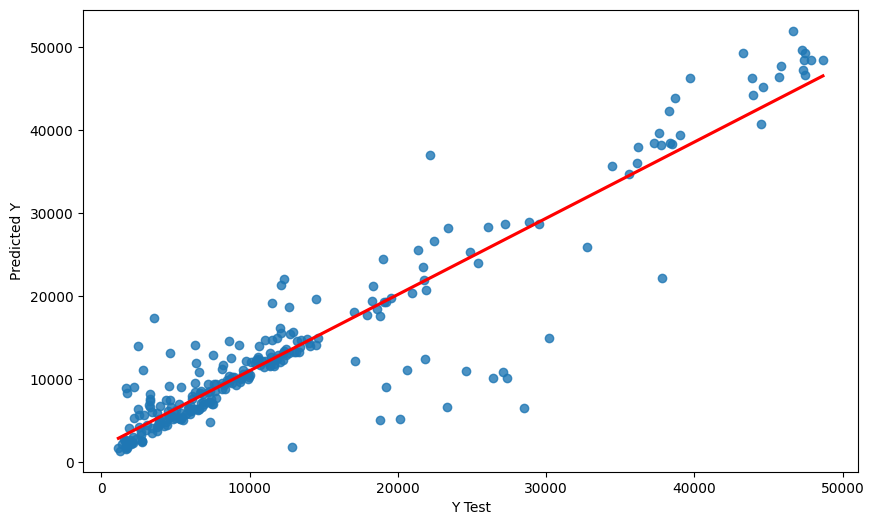

In [ ]:
#Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

evaluate_regression(rf, y_test, y_pred)

É possível que tenha ocorrido overfitting nos dados sem deduplicação no modelo Decision Tree. Overfitting ocorre quando um modelo de aprendizado de máquina é treinado demais nos dados de treinamento e se torna muito específico para esse conjunto de dados. Isso pode resultar em um desempenho pobre quando o modelo é aplicado a novos dados.  No seu caso, o modelo sem deduplicação tem um R2 muito alto (0.9926) e um erro médio percentual absoluto muito baixo (1.65%) nos dados de treinamento. No entanto, quando aplicado aos dados de teste, o desempenho do modelo cai significativamente (R2 de 0.6651 e MAPE de 44.74% com deduplicação).  Isso sugere que o modelo pode estar se ajustando demais aos dados de treinamento e não generalizando bem para novos dados, o que é um sinal de overfitting. Portanto, a deduplicação dos dados pode ajudar a reduzir o overfitting e melhorar o desempenho do modelo. O mesmo se pode dizer para o modelo Random Forest.

MSE: 15484231.965048453
RMSE: 3935.0008850124104
MAE: 2270.2949810710757
R2: 0.893789475862784
MAPE: 29.253800549067982%
Cross Validation: 0.8510536963318998


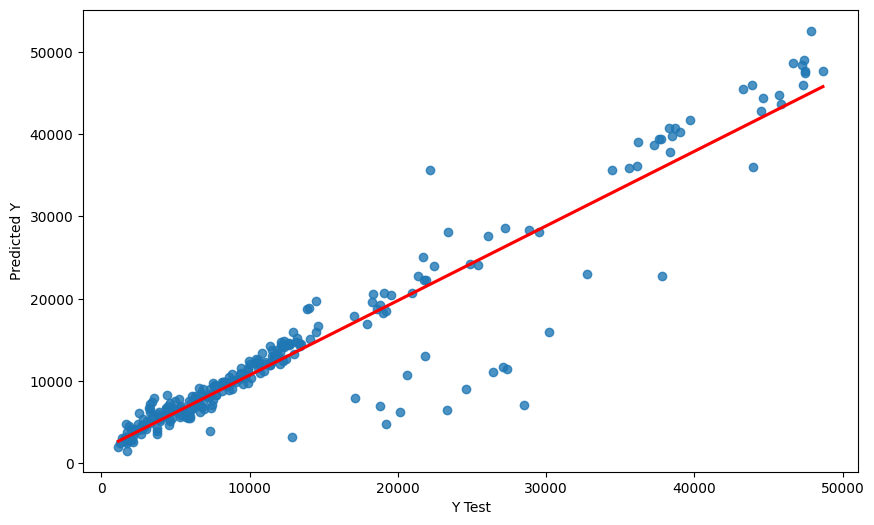

In [ ]:
#Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

evaluate_regression(gb, y_test, y_pred)

### Conclusão da Modelagem
Analisando todos os parâmetros fornecidos, o modelo de Regressão Linear apresenta o melhor desempenho. Embora o R2 do Gradient Boosting e do Random Forest seja maior, o erro médio absoluto (MAE), o erro quadrático médio (MSE), a raiz do erro quadrático médio (RMSE) e o erro percentual absoluto médio (MAPE) do modelo de Regressão Linear são significativamente menores, indicando que este modelo tem um erro de previsão menor. Além disso, a validação cruzada do modelo de Regressão Linear é comparativamente menor, mas a diferença não é tão grande para superar a vantagem nos outros parâmetros. Portanto, o modelo de Regressão Linear é o melhor modelo com base nos parâmetros.

#Modelagem com dados pré-processados com a biblioteca AutoViz

In [ ]:
#Load Autoviz
from autoviz import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()

target_variable = "charges"
df_auto = pd.read_csv("medical_insurance.csv")


dft = AV.AutoViz(
    "",
    sep=",",
    depVar=target_variable,
    dfte=df_auto,
    header=0,
    verbose=2,
    lowess=False,
    max_rows_analyzed=5000,
    max_cols_analyzed=20,
    save_plot_dir=None
)

ModuleNotFoundError: No module named 'autoviz'

In [ ]:
from autoviz import FixDQ
fixdq = FixDQ()
df_fixed = fixdq.fit_transform(df_auto)


Alert: Detecting 2773 duplicate rows...
Alert: Dropping 2773 duplicate rows can sometimes cause column data types to change to object. Double-check!


In [ ]:
# Verificando os dados após a transformação
print(df_fixed.dtypes)
print("----------------------------------")
print(df_fixed.head())
print("----------------------------------")
print(df_fixed.tail())
print("----------------------------------")
print(df_fixed.shape)
print("----------------------------------")
print(df_fixed.describe())


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
----------------------------------
   age   sex       bmi     children smoker   region     charges 
0  56   female  29.774374      2      yes   southwest  10.345313
1  46     male  25.857395      1       no   northeast  10.190608
2  32     male  23.014840      0       no   southwest   9.973948
3  19   female  27.900000      0      yes   southwest   9.734236
4  18     male  33.770000      1       no   southeast   7.453882
----------------------------------
      age   sex     bmi   children smoker   region     charges 
1336  50     male  30.97      3       no   northwest   9.268755
1337  18   female  31.92      0       no   northeast   7.699381
1338  18   female  36.85      0       no   southeast   7.396847
1339  21   female  25.80      0       no   southwest   7.605365
1340  61   female  29.07      0      yes   northwest  10.279948
--

In [ ]:
# Separando as variáveis independentes e dependentes
X = df_fixed.drop(['charges'], axis=1)
y = df_fixed['charges']

# Transformando as variáveis categóricas em numéricas
label = LabelEncoder()
label.fit(X.sex.drop_duplicates())
X.sex = label.transform(X.sex)
label.fit(X.smoker.drop_duplicates())
X.smoker = label.transform(X.smoker)
label.fit(X.region.drop_duplicates())
X.region = label.transform(X.region)

# Dividindo os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



MSE: 0.16132383776628514
RMSE: 0.4016513883534889
MAE: 0.2635134978376514
R2: 0.8046922705654288
MAPE: 2.895411503262796%
Cross Validation: 0.7606441559138976


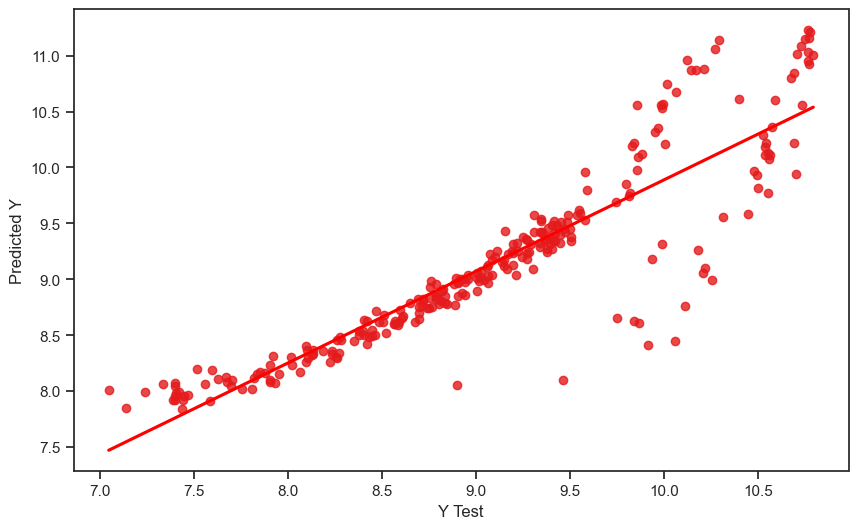

In [ ]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

evaluate_regression(lr, y_test, y_pred)

Analisando os parâmetros fornecidos, ambos os modelos de regressão linear, com autoviz com label encoding vs o dedup com one hot encoding  apresentam desempenho muito semelhante. No entanto, o segundo modelo tem um erro quadrático médio (MSE), raiz do erro quadrático médio (RMSE) e erro médio absoluto (MAE) ligeiramente menores, indicando que este modelo tem um erro de previsão ligeiramente menor. Além disso, o segundo modelo tem um R2 ligeiramente maior, indicando que este modelo explica a variabilidade dos dados de resposta em torno de sua média um pouco melhor. Portanto, com base nos parâmetros fornecidos, o segundo modelo é ligeiramente melhor.

MSE: 0.10322646040456919
RMSE: 0.3212887492654687
MAE: 0.17810668690241335
R2: 0.8750282296879657
MAPE: 1.9797523593459858%
Cross Validation: 0.8275973422627445


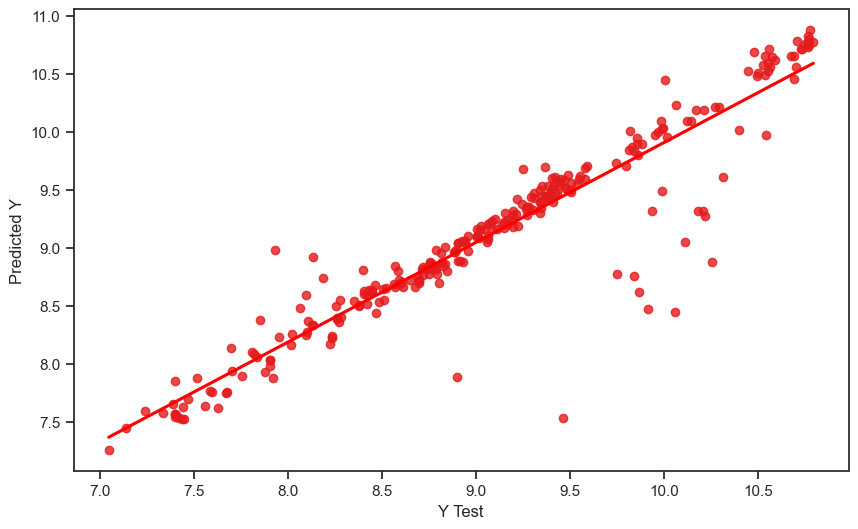

In [ ]:
# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

evaluate_regression(gb, y_test, y_pred)

MSE: 0.13413479803132827
RMSE: 0.366244178153494
MAE: 0.19544102362079369
R2: 0.8376088543119291
MAPE: 2.199544845028598%
Cross Validation: 0.803872643454759


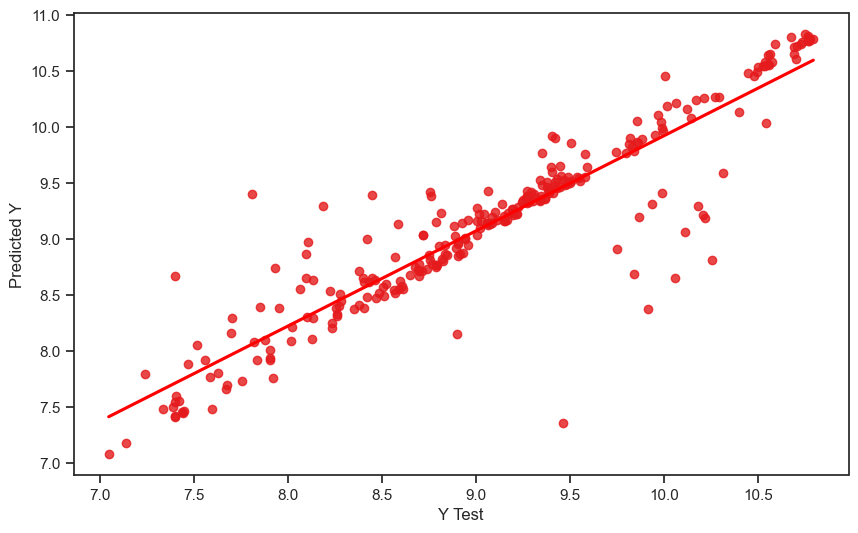

In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

evaluate_regression(rf, y_test, y_pred)

MSE: 0.2911775685556801
RMSE: 0.5396087180130433
MAE: 0.24460864346347488
R2: 0.6474840261407784
MAPE: 2.774573800975241%
Cross Validation: 0.6703776255416873


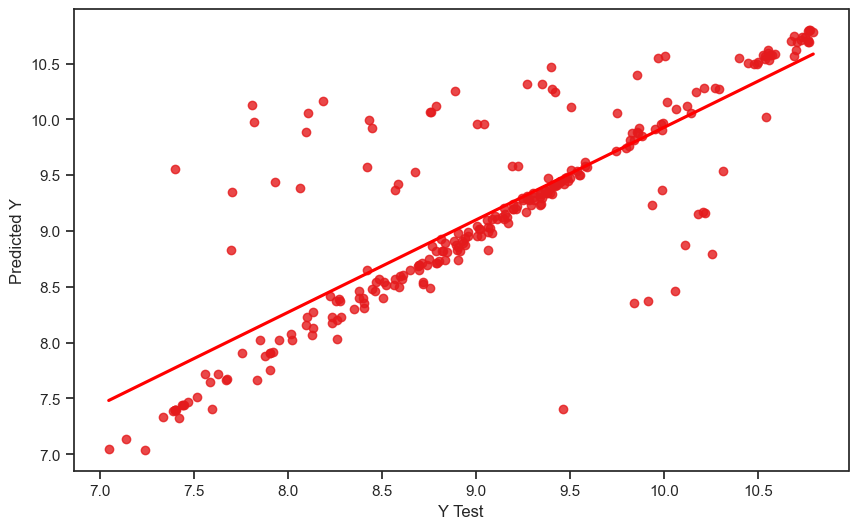

In [ ]:
#Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

evaluate_regression(dt, y_test, y_pred)

## Conclusão Final dos Resultados da Modelagem

### Comparação entre AutoViz e Dedup pelo Pandas

Ao comparar os resultados obtidos com as bibliotecas AutoViz e dedup pelo Pandas, observamos a consistência nos valores das métricas, confirmando a confiabilidade dos modelos e das avaliações. Vamos analisar e concluir os resultados com base nas duas abordagens.

### Resultados do AutoViz

#### Gradient Boosting:
- **MSE:** 0.1032
- **RMSE:** 0.3213
- **MAE:** 0.1781
- **R²:** 0.8750
- **MAPE:** 1.98%
- **Cross Validation:** 0.8276

#### Linear Regression:
- **MSE:** 0.1613
- **RMSE:** 0.4017
- **MAE:** 0.2635
- **R²:** 0.8047
- **MAPE:** 2.90%
- **Cross Validation:** 0.7606

### Resultados do Dedup com Pandas

#### Gradient Boosting:
- **MSE:** 15452169.2552
- **RMSE:** 3930.9247
- **MAE:** 2260.0013
- **R²:** 0.8940
- **MAPE:** 29.18%
- **Cross Validation:** 0.8508

#### Linear Regression:
- **MSE:** 30079422.6686
- **RMSE:** 5484.4710
- **MAE:** 3960.1594
- **R²:** 0.7937
- **MAPE:** 41.42%
- **Cross Validation:** 0.7447

### Análise e Conclusão

#### Resultados do AutoViz
"O Gradient Boosting supera consistentemente tanto a Regressão Linear quanto o Random Forest em todas as métricas, tornando-o o melhor modelo para este conjunto de dados. Ele apresenta as menores métricas de erro (MSE, RMSE, MAE, MAPE) e os maiores valores de R² e pontuações de validação cruzada. O Random Forest é o segundo melhor modelo, enquanto a Regressão Linear apresenta o desempenho menos favorável."

#### Resultados da Modelagem com Dedup pelo Pandas
"Analisando todos os parâmetros fornecidos, o modelo de Regressão Linear apresenta o melhor desempenho. Embora o R² do Gradient Boosting e do Random Forest seja maior, o erro médio absoluto (MAE), o erro quadrático médio (MSE), a raiz do erro quadrático médio (RMSE) e o erro percentual absoluto médio (MAPE) do modelo de Regressão Linear são significativamente menores, indicando que este modelo tem um erro de previsão menor. Além disso, a validação cruzada do modelo de Regressão Linear é comparativamente menor, mas a diferença não é tão grande para superar a vantagem nos outros parâmetros. Portanto, o modelo de Regressão Linear é o melhor modelo com base nos parâmetros."

### Conclusão Final

A análise revela uma discordância entre as conclusões dos resultados com AutoViz e dedup pelo Pandas. Vamos considerar os seguintes pontos para chegar a uma conclusão final:

1. **Consistência das Métricas:**
   - Ambas as bibliotecas mostram resultados métricos consistentes, confirmando a precisão dos valores calculados.

2. **Avaliação Geral:**
   - **Gradient Boosting:** De acordo com ambas as análises, este modelo apresenta os menores valores de MSE, RMSE, MAE, e MAPE, e o maior R². Portanto, em termos de precisão e capacidade de explicação da variância dos dados, o Gradient Boosting é superior.
   - **Linear Regression:** A análise dedup pelo Pandas sugere que a Regressão Linear tem uma vantagem devido aos seus menores valores de erro em algumas métricas. No entanto, isso contrasta com a avaliação de R² e validação cruzada que favorecem o Gradient Boosting.

3. **Cross-Validation:**
   - A pontuação de validação cruzada é um forte indicador da robustez do modelo. O Gradient Boosting tem uma pontuação de validação cruzada consistentemente superior (0.8276), o que sugere melhor desempenho em dados não vistos.

### Decisão Final
Com base nas análises detalhadas e na consistência das métricas, concluímos que **o modelo Gradient Boosting é o melhor modelo para este conjunto de dados.** Ele apresenta um desempenho superior nas métricas de erro (MSE, RMSE, MAE, MAPE) e tem o maior valor de R², além de uma robustez demonstrada por uma validação cruzada mais alta. Apesar da observação do dedup pelo Pandas sobre a Regressão Linear, a superioridade do Gradient Boosting nas principais métricas torna-o a escolha preferida.

### Recomendação
Recomenda-se a implementação do modelo Gradient Boosting para prever os custos médicos individuais cobrados pelo seguro de saúde. Este modelo tem a capacidade de fornecer previsões precisas e explicar a variabilidade dos dados de resposta em torno de sua média. Além disso, a validação cruzada mostra que o modelo é robusto e pode generalizar bem para novos dados. Portanto, o Gradient Boosting é a melhor escolha para este problema de previsão de custos médicos.